In [2]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [5]:
import os
import multiprocessing
from pysnptools.util.filecache import LocalCache
from pysnptools.snpreader import SnpGen
from pysnptools.snpreader import DistributedBed
from pysnptools.util.mapreduce1.runner import LocalMultiProc

seed = 1
iid_count = 50*1000 # number of individuals, e.g. 1000000 #!!!cmk none of these numbers match
sid_count = 50*1000 # number of SNPs, e.g. 1000000
chrom_count = 10
piece_per_chrom_count = 5 #Number of pieces for each chromosome, e.g. 100

storage = LocalCache(r'd:\deldir\testsnps_{0}_{1}_{2}_{3}\data'.format(seed,chrom_count,iid_count,sid_count))#!!!cmk too local

In [6]:
logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.tree_cache.rmtree() # remove all intermediate files

storage.rmtree()
snpgen = SnpGen(seed=seed,iid_count=iid_count,sid_count=sid_count,chrom_count=chrom_count) #Create an on-the-fly SNP generator
cpu_count = 5 #multiprocessing.cpu_count() #!!!cmk

runner = LocalMultiProc(cpu_count)

snpreader = DistributedBed.write(storage,snpgen,piece_per_chrom_count=piece_per_chrom_count,runner=runner)
print snpreader

INFO:root:rmtree -- d:/deldir/testsnps_1_10_50000_50000/data



open_write('metadata.npz',size=0)
open_write('reader_name_list.npz',size=0)
open_read('chrom1.piece0of5.fam')
Loading fam file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece0of5.fam
_MergeCols looking at reader #0: _Distributed1Bed('chrom1.piece0of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
open_read('chrom1.piece0of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece0of5.bim
open_read('chrom1.piece1of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece1of5.bim
open_read('chrom1.piece2of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece2of5.bim
open_read('chrom1.piece3of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece3of5.bim
open_read('chrom1.piece4of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom1.piece4of5.bim
open_read('chrom2.piece0of5.bim')
Loading bim file d:/deldir/testsnps_1_10_50000_50000/data/chrom2.piece0of5.bim
o

In [9]:
from pysnptools.util.filecache import LocalCache
from pysnptools.snpreader import DistributedBed

test_snps = DistributedBed(storage)
test_snps.shape

open_read('metadata.npz')
open_read('reader_name_list.npz')
close('reader_name_list.npz')
close('metadata.npz')


(50000, 50000)

In [10]:
#Generate random pheno and covar
import numpy as np
from pysnptools.snpreader import SnpData
np.random.seed(seed)
pheno = SnpData(iid=test_snps.iid,sid=['pheno'],val=np.random.randn(test_snps.iid_count,1)*3+2)
covar = SnpData(iid=test_snps.iid,sid=['covar1','covar2'],val=np.random.randn(test_snps.iid_count,2)*2-3)

In [11]:
chrom1 = test_snps.pos[:,0]==1
real_test_snps = test_snps[:,chrom1]
real_test_snps.shape 

(50000, 6824)

Try 50K x 50K on classic to see if SVD fails

In [17]:
%%time
import logging
from fastlmm.association import single_snp

iid_count = 25 * 1000

logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.
results_df1 = single_snp(real_test_snps[:iid_count,:], pheno[:iid_count,:], G0=test_snps[:iid_count,:iid_count], covar=covar[:iid_count,:], count_A1=True)
results_df1

Setting GB_goal to 32.2878968079 GB
Starting read from 16 subreaders
Reading from #5: _Distributed1Bed('chrom2.piece0of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #6: _Distributed1Bed('chrom2.piece1of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #7: _Distributed1Bed('chrom2.piece2of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #8: _Distributed1Bed('chrom2.piece3of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #9: _Distributed1Bed('chrom2.piece4of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #10: _Distributed1Bed('chrom3.piece0of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #11: _Distributed1Bed('chrom3.piece1of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading from #12: _Distributed1Bed('chrom3.piece2of5.bed','LocalCache('d:/deldir/testsnps_1_10_50000_50000/data')')
Reading 

In [13]:
test_snps[:iid_count,:iid_count].shape

(20000, 20000)

In [14]:
results_df1

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2723,sid_2723,1.0,0.0,104944421.0,0.000007,0.107478,0.023904,0.031780,0.0,0.0
1,3130,sid_3130,1.0,0.0,120630201.0,0.000062,0.095854,0.023928,0.028318,0.0,0.0
2,2454,sid_2454,1.0,0.0,94577161.0,0.000136,-0.091533,0.023991,0.026971,0.0,0.0
3,470,sid_470,1.0,0.0,18113801.0,0.000283,-0.087195,0.024015,0.025668,0.0,0.0
4,1587,sid_1587,1.0,0.0,61162981.0,0.000692,0.081302,0.023959,0.023991,0.0,0.0
5,2040,sid_2040,1.0,0.0,78621601.0,0.000994,-0.079001,0.023993,0.023279,0.0,0.0
6,3017,sid_3017,1.0,0.0,116275181.0,0.001276,-0.077465,0.024044,0.022778,0.0,0.0
7,1443,sid_1443,1.0,0.0,55613221.0,0.001305,-0.077045,0.023961,0.022733,0.0,0.0
8,5447,sid_5447,1.0,0.0,209927381.0,0.001697,-0.075055,0.023909,0.022194,0.0,0.0
9,277,sid_277,1.0,0.0,10675581.0,0.001880,-0.074416,0.023936,0.021981,0.0,0.0


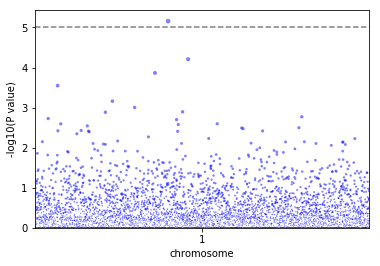

lambda=0.1936


C:\Users\Carl\Anaconda2\lib\site-packages\numpy\lib\scimath.py:122: RuntimeWarning: invalid value encountered in less
  if any(isreal(x) & (x < 0)):


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2723,sid_2723,1.0,0.0,104944421.0,0.000007,0.107478,0.023904,0.031780,0.0,0.0
1,3130,sid_3130,1.0,0.0,120630201.0,0.000062,0.095854,0.023928,0.028318,0.0,0.0
2,2454,sid_2454,1.0,0.0,94577161.0,0.000136,-0.091533,0.023991,0.026971,0.0,0.0
3,470,sid_470,1.0,0.0,18113801.0,0.000283,-0.087195,0.024015,0.025668,0.0,0.0
4,1587,sid_1587,1.0,0.0,61162981.0,0.000692,0.081302,0.023959,0.023991,0.0,0.0
5,2040,sid_2040,1.0,0.0,78621601.0,0.000994,-0.079001,0.023993,0.023279,0.0,0.0
6,3017,sid_3017,1.0,0.0,116275181.0,0.001276,-0.077465,0.024044,0.022778,0.0,0.0
7,1443,sid_1443,1.0,0.0,55613221.0,0.001305,-0.077045,0.023961,0.022733,0.0,0.0
8,5447,sid_5447,1.0,0.0,209927381.0,0.001697,-0.075055,0.023909,0.022194,0.0,0.0
9,277,sid_277,1.0,0.0,10675581.0,0.001880,-0.074416,0.023936,0.021981,0.0,0.0


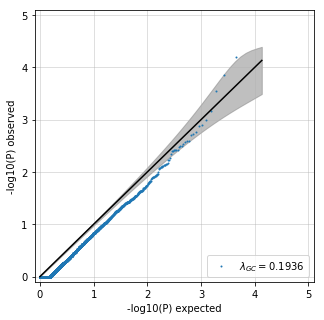

In [15]:
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df1[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df1["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df1.head(n=10)

In [7]:
%%time
import logging
from fastlmm.util.runner import LocalMultiProc
logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.
# import the algorithm
from fastlmm.ludicrous.single_snp_low import single_snp2

# run gwas
###################################################################
from fastlmm.ludicrous.file_cache import LocalCache
storage = LocalCache(r'd:\deldir\cache3')
#storage.rmtree()
runner = None#LocalMultiProc(2)
cache_dict={chrom:storage for chrom in xrange(23)}
results_df = single_snp2(cache_dict, test_snps,  pheno, G0=test_snps, covar=covar, count_A1=True, runner=runner)
results_df

open_read('ss_per_snp.npz')
close('ss_per_snp.npz')
Starting postsvd reduce for chrom '6' with file downloads
open_read('SVinv_etc6.npz')
close('SVinv_etc6.npz')
open_read('G0_data.dat')
open_read('G0_data.npz')
close('G0_data.npz')
close('G0_data.dat')
post svd, chrom 6: Working on part 0 of 25
open_write('0_25.dat',size=0)
About to read
on sid_index 0 of 9050
on sid_index 100 of 9050
on sid_index 200 of 9050
on sid_index 300 of 9050
on sid_index 400 of 9050
on sid_index 500 of 9050
on sid_index 600 of 9050
on sid_index 700 of 9050
on sid_index 800 of 9050
on sid_index 900 of 9050
on sid_index 1000 of 9050
on sid_index 1100 of 9050
on sid_index 1200 of 9050
on sid_index 1300 of 9050
on sid_index 1400 of 9050
on sid_index 1500 of 9050
on sid_index 1600 of 9050
on sid_index 1700 of 9050
on sid_index 1800 of 9050
on sid_index 1900 of 9050
on sid_index 2000 of 9050
on sid_index 2100 of 9050
on sid_index 2200 of 9050
on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 

open_read('G0_data.npz')
close('G0_data.npz')
close('G0_data.dat')
post svd, chrom 6: Working on part 3 of 25
open_write('3_25.dat',size=0)
About to read
on sid_index 0 of 9050
on sid_index 100 of 9050
on sid_index 200 of 9050
on sid_index 300 of 9050
on sid_index 400 of 9050
on sid_index 500 of 9050
on sid_index 600 of 9050
on sid_index 700 of 9050
on sid_index 800 of 9050
on sid_index 900 of 9050
on sid_index 1000 of 9050
on sid_index 1100 of 9050
on sid_index 1200 of 9050
on sid_index 1300 of 9050
on sid_index 1400 of 9050
on sid_index 1500 of 9050
on sid_index 1600 of 9050
on sid_index 1700 of 9050
on sid_index 1800 of 9050
on sid_index 1900 of 9050
on sid_index 2000 of 9050
on sid_index 2100 of 9050
on sid_index 2200 of 9050
on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 9050
on sid_index 2600 of 9050
on sid_index 2700 of 9050
on sid_index 2800 of 9050
on sid_index 2900 of 9050
on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050


on sid_index 100 of 9050
on sid_index 200 of 9050
on sid_index 300 of 9050
on sid_index 400 of 9050
on sid_index 500 of 9050
on sid_index 600 of 9050
on sid_index 700 of 9050
on sid_index 800 of 9050
on sid_index 900 of 9050
on sid_index 1000 of 9050
on sid_index 1100 of 9050
on sid_index 1200 of 9050
on sid_index 1300 of 9050
on sid_index 1400 of 9050
on sid_index 1500 of 9050
on sid_index 1600 of 9050
on sid_index 1700 of 9050
on sid_index 1800 of 9050
on sid_index 1900 of 9050
on sid_index 2000 of 9050
on sid_index 2100 of 9050
on sid_index 2200 of 9050
on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 9050
on sid_index 2600 of 9050
on sid_index 2700 of 9050
on sid_index 2800 of 9050
on sid_index 2900 of 9050
on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050
on sid_index 3300 of 9050
on sid_index 3400 of 9050
on sid_index 3500 of 9050
on sid_index 3600 of 9050
on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 

on sid_index 900 of 9050
on sid_index 1000 of 9050
on sid_index 1100 of 9050
on sid_index 1200 of 9050
on sid_index 1300 of 9050
on sid_index 1400 of 9050
on sid_index 1500 of 9050
on sid_index 1600 of 9050
on sid_index 1700 of 9050
on sid_index 1800 of 9050
on sid_index 1900 of 9050
on sid_index 2000 of 9050
on sid_index 2100 of 9050
on sid_index 2200 of 9050
on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 9050
on sid_index 2600 of 9050
on sid_index 2700 of 9050
on sid_index 2800 of 9050
on sid_index 2900 of 9050
on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050
on sid_index 3300 of 9050
on sid_index 3400 of 9050
on sid_index 3500 of 9050
on sid_index 3600 of 9050
on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 9050
on sid_index 4000 of 9050
on sid_index 4100 of 9050
on sid_index 4200 of 9050
on sid_index 4300 of 9050
on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 

on sid_index 1600 of 9050
on sid_index 1700 of 9050
on sid_index 1800 of 9050
on sid_index 1900 of 9050
on sid_index 2000 of 9050
on sid_index 2100 of 9050
on sid_index 2200 of 9050
on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 9050
on sid_index 2600 of 9050
on sid_index 2700 of 9050
on sid_index 2800 of 9050
on sid_index 2900 of 9050
on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050
on sid_index 3300 of 9050
on sid_index 3400 of 9050
on sid_index 3500 of 9050
on sid_index 3600 of 9050
on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 9050
on sid_index 4000 of 9050
on sid_index 4100 of 9050
on sid_index 4200 of 9050
on sid_index 4300 of 9050
on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 4700 of 9050
on sid_index 4800 of 9050
on sid_index 4900 of 9050
on sid_index 5000 of 9050
on sid_index 5100 of 9050
on sid_index 5200 of 9050
on sid_index 5300 of 9050
on sid_index

on sid_index 2300 of 9050
on sid_index 2400 of 9050
on sid_index 2500 of 9050
on sid_index 2600 of 9050
on sid_index 2700 of 9050
on sid_index 2800 of 9050
on sid_index 2900 of 9050
on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050
on sid_index 3300 of 9050
on sid_index 3400 of 9050
on sid_index 3500 of 9050
on sid_index 3600 of 9050
on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 9050
on sid_index 4000 of 9050
on sid_index 4100 of 9050
on sid_index 4200 of 9050
on sid_index 4300 of 9050
on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 4700 of 9050
on sid_index 4800 of 9050
on sid_index 4900 of 9050
on sid_index 5000 of 9050
on sid_index 5100 of 9050
on sid_index 5200 of 9050
on sid_index 5300 of 9050
on sid_index 5400 of 9050
on sid_index 5500 of 9050
on sid_index 5600 of 9050
on sid_index 5700 of 9050
on sid_index 5800 of 9050
on sid_index 5900 of 9050
on sid_index 6000 of 9050
on sid_index

on sid_index 3000 of 9050
on sid_index 3100 of 9050
on sid_index 3200 of 9050
on sid_index 3300 of 9050
on sid_index 3400 of 9050
on sid_index 3500 of 9050
on sid_index 3600 of 9050
on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 9050
on sid_index 4000 of 9050
on sid_index 4100 of 9050
on sid_index 4200 of 9050
on sid_index 4300 of 9050
on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 4700 of 9050
on sid_index 4800 of 9050
on sid_index 4900 of 9050
on sid_index 5000 of 9050
on sid_index 5100 of 9050
on sid_index 5200 of 9050
on sid_index 5300 of 9050
on sid_index 5400 of 9050
on sid_index 5500 of 9050
on sid_index 5600 of 9050
on sid_index 5700 of 9050
on sid_index 5800 of 9050
on sid_index 5900 of 9050
on sid_index 6000 of 9050
on sid_index 6100 of 9050
on sid_index 6200 of 9050
on sid_index 6300 of 9050
on sid_index 6400 of 9050
on sid_index 6500 of 9050
on sid_index 6600 of 9050
on sid_index 6700 of 9050
on sid_index

on sid_index 3700 of 9050
on sid_index 3800 of 9050
on sid_index 3900 of 9050
on sid_index 4000 of 9050
on sid_index 4100 of 9050
on sid_index 4200 of 9050
on sid_index 4300 of 9050
on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 4700 of 9050
on sid_index 4800 of 9050
on sid_index 4900 of 9050
on sid_index 5000 of 9050
on sid_index 5100 of 9050
on sid_index 5200 of 9050
on sid_index 5300 of 9050
on sid_index 5400 of 9050
on sid_index 5500 of 9050
on sid_index 5600 of 9050
on sid_index 5700 of 9050
on sid_index 5800 of 9050
on sid_index 5900 of 9050
on sid_index 6000 of 9050
on sid_index 6100 of 9050
on sid_index 6200 of 9050
on sid_index 6300 of 9050
on sid_index 6400 of 9050
on sid_index 6500 of 9050
on sid_index 6600 of 9050
on sid_index 6700 of 9050
on sid_index 6800 of 9050
on sid_index 6900 of 9050
on sid_index 7000 of 9050
on sid_index 7100 of 9050
on sid_index 7200 of 9050
on sid_index 7300 of 9050
on sid_index 7400 of 9050
on sid_index

on sid_index 4400 of 9050
on sid_index 4500 of 9050
on sid_index 4600 of 9050
on sid_index 4700 of 9050
on sid_index 4800 of 9050
on sid_index 4900 of 9050
on sid_index 5000 of 9050
on sid_index 5100 of 9050
on sid_index 5200 of 9050
on sid_index 5300 of 9050
on sid_index 5400 of 9050
on sid_index 5500 of 9050
on sid_index 5600 of 9050
on sid_index 5700 of 9050
on sid_index 5800 of 9050
on sid_index 5900 of 9050
on sid_index 6000 of 9050
on sid_index 6100 of 9050
on sid_index 6200 of 9050
on sid_index 6300 of 9050
on sid_index 6400 of 9050
on sid_index 6500 of 9050
on sid_index 6600 of 9050
on sid_index 6700 of 9050
on sid_index 6800 of 9050
on sid_index 6900 of 9050
on sid_index 7000 of 9050
on sid_index 7100 of 9050
on sid_index 7200 of 9050
on sid_index 7300 of 9050
on sid_index 7400 of 9050
on sid_index 7500 of 9050
on sid_index 7600 of 9050
on sid_index 7700 of 9050
on sid_index 7800 of 9050
on sid_index 7900 of 9050
on sid_index 8000 of 9050
on sid_index 8100 of 9050
on sid_index

on sid_index 2200 of 9113
on sid_index 2300 of 9113
on sid_index 2400 of 9113
on sid_index 2500 of 9113
on sid_index 2600 of 9113
on sid_index 2700 of 9113
on sid_index 2800 of 9113
on sid_index 2900 of 9113
on sid_index 3000 of 9113
on sid_index 3100 of 9113
on sid_index 3200 of 9113
on sid_index 3300 of 9113
on sid_index 3400 of 9113
on sid_index 3500 of 9113
on sid_index 3600 of 9113
on sid_index 3700 of 9113
on sid_index 3800 of 9113
on sid_index 3900 of 9113
on sid_index 4000 of 9113
on sid_index 4100 of 9113
on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index

on sid_index 2600 of 9113
on sid_index 2700 of 9113
on sid_index 2800 of 9113
on sid_index 2900 of 9113
on sid_index 3000 of 9113
on sid_index 3100 of 9113
on sid_index 3200 of 9113
on sid_index 3300 of 9113
on sid_index 3400 of 9113
on sid_index 3500 of 9113
on sid_index 3600 of 9113
on sid_index 3700 of 9113
on sid_index 3800 of 9113
on sid_index 3900 of 9113
on sid_index 4000 of 9113
on sid_index 4100 of 9113
on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index

on sid_index 3000 of 9113
on sid_index 3100 of 9113
on sid_index 3200 of 9113
on sid_index 3300 of 9113
on sid_index 3400 of 9113
on sid_index 3500 of 9113
on sid_index 3600 of 9113
on sid_index 3700 of 9113
on sid_index 3800 of 9113
on sid_index 3900 of 9113
on sid_index 4000 of 9113
on sid_index 4100 of 9113
on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index

on sid_index 3400 of 9113
on sid_index 3500 of 9113
on sid_index 3600 of 9113
on sid_index 3700 of 9113
on sid_index 3800 of 9113
on sid_index 3900 of 9113
on sid_index 4000 of 9113
on sid_index 4100 of 9113
on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index 6800 of 9113
on sid_index 6900 of 9113
on sid_index 7000 of 9113
on sid_index 7100 of 9113
on sid_index

on sid_index 3800 of 9113
on sid_index 3900 of 9113
on sid_index 4000 of 9113
on sid_index 4100 of 9113
on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index 6800 of 9113
on sid_index 6900 of 9113
on sid_index 7000 of 9113
on sid_index 7100 of 9113
on sid_index 7200 of 9113
on sid_index 7300 of 9113
on sid_index 7400 of 9113
on sid_index 7500 of 9113
on sid_index

on sid_index 4200 of 9113
on sid_index 4300 of 9113
on sid_index 4400 of 9113
on sid_index 4500 of 9113
on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index 6800 of 9113
on sid_index 6900 of 9113
on sid_index 7000 of 9113
on sid_index 7100 of 9113
on sid_index 7200 of 9113
on sid_index 7300 of 9113
on sid_index 7400 of 9113
on sid_index 7500 of 9113
on sid_index 7600 of 9113
on sid_index 7700 of 9113
on sid_index 7800 of 9113
on sid_index 7900 of 9113
on sid_index

on sid_index 4600 of 9113
on sid_index 4700 of 9113
on sid_index 4800 of 9113
on sid_index 4900 of 9113
on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index 6800 of 9113
on sid_index 6900 of 9113
on sid_index 7000 of 9113
on sid_index 7100 of 9113
on sid_index 7200 of 9113
on sid_index 7300 of 9113
on sid_index 7400 of 9113
on sid_index 7500 of 9113
on sid_index 7600 of 9113
on sid_index 7700 of 9113
on sid_index 7800 of 9113
on sid_index 7900 of 9113
on sid_index 8000 of 9113
on sid_index 8100 of 9113
on sid_index 8200 of 9113
on sid_index 8300 of 9113
on sid_index

on sid_index 5000 of 9113
on sid_index 5100 of 9113
on sid_index 5200 of 9113
on sid_index 5300 of 9113
on sid_index 5400 of 9113
on sid_index 5500 of 9113
on sid_index 5600 of 9113
on sid_index 5700 of 9113
on sid_index 5800 of 9113
on sid_index 5900 of 9113
on sid_index 6000 of 9113
on sid_index 6100 of 9113
on sid_index 6200 of 9113
on sid_index 6300 of 9113
on sid_index 6400 of 9113
on sid_index 6500 of 9113
on sid_index 6600 of 9113
on sid_index 6700 of 9113
on sid_index 6800 of 9113
on sid_index 6900 of 9113
on sid_index 7000 of 9113
on sid_index 7100 of 9113
on sid_index 7200 of 9113
on sid_index 7300 of 9113
on sid_index 7400 of 9113
on sid_index 7500 of 9113
on sid_index 7600 of 9113
on sid_index 7700 of 9113
on sid_index 7800 of 9113
on sid_index 7900 of 9113
on sid_index 8000 of 9113
on sid_index 8100 of 9113
on sid_index 8200 of 9113
on sid_index 8300 of 9113
on sid_index 8400 of 9113
on sid_index 8500 of 9113
on sid_index 8600 of 9113
on sid_index 8700 of 9113
on sid_index

open_read('7_25.dat')
About to open piece 7 of 25
close('7_25.dat')
open_read('8_25.dat')
About to open piece 8 of 25
close('8_25.dat')
open_read('9_25.dat')
About to open piece 9 of 25
close('9_25.dat')
open_read('10_25.dat')
About to open piece 10 of 25
close('10_25.dat')
open_read('11_25.dat')
About to open piece 11 of 25
close('11_25.dat')
open_read('12_25.dat')
About to open piece 12 of 25
close('12_25.dat')
open_read('13_25.dat')
About to open piece 13 of 25
close('13_25.dat')
open_read('14_25.dat')
About to open piece 14 of 25
close('14_25.dat')
open_read('15_25.dat')
About to open piece 15 of 25
close('15_25.dat')
open_read('16_25.dat')
About to open piece 16 of 25
close('16_25.dat')
open_read('17_25.dat')
About to open piece 17 of 25
close('17_25.dat')
open_read('18_25.dat')
About to open piece 18 of 25
close('18_25.dat')
open_read('19_25.dat')
About to open piece 19 of 25
close('19_25.dat')
open_read('20_25.dat')
About to open piece 20 of 25
close('20_25.dat')
open_read('21_2

on sid_index 3100 of 9195
on sid_index 3200 of 9195
on sid_index 3300 of 9195
on sid_index 3400 of 9195
on sid_index 3500 of 9195
on sid_index 3600 of 9195
on sid_index 3700 of 9195
on sid_index 3800 of 9195
on sid_index 3900 of 9195
on sid_index 4000 of 9195
on sid_index 4100 of 9195
on sid_index 4200 of 9195
on sid_index 4300 of 9195
on sid_index 4400 of 9195
on sid_index 4500 of 9195
on sid_index 4600 of 9195
on sid_index 4700 of 9195
on sid_index 4800 of 9195
on sid_index 4900 of 9195
on sid_index 5000 of 9195
on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index

on sid_index 3500 of 9195
on sid_index 3600 of 9195
on sid_index 3700 of 9195
on sid_index 3800 of 9195
on sid_index 3900 of 9195
on sid_index 4000 of 9195
on sid_index 4100 of 9195
on sid_index 4200 of 9195
on sid_index 4300 of 9195
on sid_index 4400 of 9195
on sid_index 4500 of 9195
on sid_index 4600 of 9195
on sid_index 4700 of 9195
on sid_index 4800 of 9195
on sid_index 4900 of 9195
on sid_index 5000 of 9195
on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index

on sid_index 3900 of 9195
on sid_index 4000 of 9195
on sid_index 4100 of 9195
on sid_index 4200 of 9195
on sid_index 4300 of 9195
on sid_index 4400 of 9195
on sid_index 4500 of 9195
on sid_index 4600 of 9195
on sid_index 4700 of 9195
on sid_index 4800 of 9195
on sid_index 4900 of 9195
on sid_index 5000 of 9195
on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index

on sid_index 4300 of 9195
on sid_index 4400 of 9195
on sid_index 4500 of 9195
on sid_index 4600 of 9195
on sid_index 4700 of 9195
on sid_index 4800 of 9195
on sid_index 4900 of 9195
on sid_index 5000 of 9195
on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index 7700 of 9195
on sid_index 7800 of 9195
on sid_index 7900 of 9195
on sid_index 8000 of 9195
on sid_index

on sid_index 4700 of 9195
on sid_index 4800 of 9195
on sid_index 4900 of 9195
on sid_index 5000 of 9195
on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index 7700 of 9195
on sid_index 7800 of 9195
on sid_index 7900 of 9195
on sid_index 8000 of 9195
on sid_index 8100 of 9195
on sid_index 8200 of 9195
on sid_index 8300 of 9195
on sid_index 8400 of 9195
on sid_index

on sid_index 5100 of 9195
on sid_index 5200 of 9195
on sid_index 5300 of 9195
on sid_index 5400 of 9195
on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index 7700 of 9195
on sid_index 7800 of 9195
on sid_index 7900 of 9195
on sid_index 8000 of 9195
on sid_index 8100 of 9195
on sid_index 8200 of 9195
on sid_index 8300 of 9195
on sid_index 8400 of 9195
on sid_index 8500 of 9195
on sid_index 8600 of 9195
on sid_index 8700 of 9195
on sid_index 8800 of 9195
on sid_index

on sid_index 5500 of 9195
on sid_index 5600 of 9195
on sid_index 5700 of 9195
on sid_index 5800 of 9195
on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index 7700 of 9195
on sid_index 7800 of 9195
on sid_index 7900 of 9195
on sid_index 8000 of 9195
on sid_index 8100 of 9195
on sid_index 8200 of 9195
on sid_index 8300 of 9195
on sid_index 8400 of 9195
on sid_index 8500 of 9195
on sid_index 8600 of 9195
on sid_index 8700 of 9195
on sid_index 8800 of 9195
on sid_index 8900 of 9195
on sid_index 9000 of 9195
on sid_index 9100 of 9195
About to mult
About to save
post svd p

on sid_index 5900 of 9195
on sid_index 6000 of 9195
on sid_index 6100 of 9195
on sid_index 6200 of 9195
on sid_index 6300 of 9195
on sid_index 6400 of 9195
on sid_index 6500 of 9195
on sid_index 6600 of 9195
on sid_index 6700 of 9195
on sid_index 6800 of 9195
on sid_index 6900 of 9195
on sid_index 7000 of 9195
on sid_index 7100 of 9195
on sid_index 7200 of 9195
on sid_index 7300 of 9195
on sid_index 7400 of 9195
on sid_index 7500 of 9195
on sid_index 7600 of 9195
on sid_index 7700 of 9195
on sid_index 7800 of 9195
on sid_index 7900 of 9195
on sid_index 8000 of 9195
on sid_index 8100 of 9195
on sid_index 8200 of 9195
on sid_index 8300 of 9195
on sid_index 8400 of 9195
on sid_index 8500 of 9195
on sid_index 8600 of 9195
on sid_index 8700 of 9195
on sid_index 8800 of 9195
on sid_index 8900 of 9195
on sid_index 9000 of 9195
on sid_index 9100 of 9195
About to mult
About to save
post svd piece: clocktime 0:05:33.484000
close('23_25.dat')
open_read('SVinv_etc8.npz')
close('SVinv_etc8.npz')
op

on sid_index 3500 of 9248
on sid_index 3600 of 9248
on sid_index 3700 of 9248
on sid_index 3800 of 9248
on sid_index 3900 of 9248
on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index

on sid_index 3600 of 9248
on sid_index 3700 of 9248
on sid_index 3800 of 9248
on sid_index 3900 of 9248
on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index

on sid_index 3700 of 9248
on sid_index 3800 of 9248
on sid_index 3900 of 9248
on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index

on sid_index 3800 of 9248
on sid_index 3900 of 9248
on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index

on sid_index 3900 of 9248
on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index 7600 of 9248
on sid_index

on sid_index 4000 of 9248
on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index 7600 of 9248
on sid_index 7700 of 9248
on sid_index

on sid_index 4100 of 9248
on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index 7600 of 9248
on sid_index 7700 of 9248
on sid_index 7800 of 9248
on sid_index

on sid_index 4200 of 9248
on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index 7600 of 9248
on sid_index 7700 of 9248
on sid_index 7800 of 9248
on sid_index 7900 of 9248
on sid_index

on sid_index 4300 of 9248
on sid_index 4400 of 9248
on sid_index 4500 of 9248
on sid_index 4600 of 9248
on sid_index 4700 of 9248
on sid_index 4800 of 9248
on sid_index 4900 of 9248
on sid_index 5000 of 9248
on sid_index 5100 of 9248
on sid_index 5200 of 9248
on sid_index 5300 of 9248
on sid_index 5400 of 9248
on sid_index 5500 of 9248
on sid_index 5600 of 9248
on sid_index 5700 of 9248
on sid_index 5800 of 9248
on sid_index 5900 of 9248
on sid_index 6000 of 9248
on sid_index 6100 of 9248
on sid_index 6200 of 9248
on sid_index 6300 of 9248
on sid_index 6400 of 9248
on sid_index 6500 of 9248
on sid_index 6600 of 9248
on sid_index 6700 of 9248
on sid_index 6800 of 9248
on sid_index 6900 of 9248
on sid_index 7000 of 9248
on sid_index 7100 of 9248
on sid_index 7200 of 9248
on sid_index 7300 of 9248
on sid_index 7400 of 9248
on sid_index 7500 of 9248
on sid_index 7600 of 9248
on sid_index 7700 of 9248
on sid_index 7800 of 9248
on sid_index 7900 of 9248
on sid_index 8000 of 9248
on sid_index

on sid_index 1700 of 9253
on sid_index 1800 of 9253
on sid_index 1900 of 9253
on sid_index 2000 of 9253
on sid_index 2100 of 9253
on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index

on sid_index 1800 of 9253
on sid_index 1900 of 9253
on sid_index 2000 of 9253
on sid_index 2100 of 9253
on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index

on sid_index 1900 of 9253
on sid_index 2000 of 9253
on sid_index 2100 of 9253
on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index

on sid_index 2000 of 9253
on sid_index 2100 of 9253
on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index 5700 of 9253
on sid_index

on sid_index 2100 of 9253
on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index 5700 of 9253
on sid_index 5800 of 9253
on sid_index

on sid_index 2200 of 9253
on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index 5700 of 9253
on sid_index 5800 of 9253
on sid_index 5900 of 9253
on sid_index

on sid_index 2300 of 9253
on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index 5700 of 9253
on sid_index 5800 of 9253
on sid_index 5900 of 9253
on sid_index 6000 of 9253
on sid_index

on sid_index 2400 of 9253
on sid_index 2500 of 9253
on sid_index 2600 of 9253
on sid_index 2700 of 9253
on sid_index 2800 of 9253
on sid_index 2900 of 9253
on sid_index 3000 of 9253
on sid_index 3100 of 9253
on sid_index 3200 of 9253
on sid_index 3300 of 9253
on sid_index 3400 of 9253
on sid_index 3500 of 9253
on sid_index 3600 of 9253
on sid_index 3700 of 9253
on sid_index 3800 of 9253
on sid_index 3900 of 9253
on sid_index 4000 of 9253
on sid_index 4100 of 9253
on sid_index 4200 of 9253
on sid_index 4300 of 9253
on sid_index 4400 of 9253
on sid_index 4500 of 9253
on sid_index 4600 of 9253
on sid_index 4700 of 9253
on sid_index 4800 of 9253
on sid_index 4900 of 9253
on sid_index 5000 of 9253
on sid_index 5100 of 9253
on sid_index 5200 of 9253
on sid_index 5300 of 9253
on sid_index 5400 of 9253
on sid_index 5500 of 9253
on sid_index 5600 of 9253
on sid_index 5700 of 9253
on sid_index 5800 of 9253
on sid_index 5900 of 9253
on sid_index 6000 of 9253
on sid_index 6100 of 9253
on sid_index

open_read('21_25.dat')
close('21_25.dat')
open_read('22_25.dat')
close('22_25.dat')
open_read('23_25.dat')
close('23_25.dat')
open_read('24_25.dat')
close('24_25.dat')
File downloads took 1:48:53.055000. Next putting U together
open_write('U10.dat',size=0)
open_write('U10.npz',size=0)
open_read('0_25.dat')
About to open piece 0 of 25
close('0_25.dat')
open_read('1_25.dat')
About to open piece 1 of 25
close('1_25.dat')
open_read('2_25.dat')
About to open piece 2 of 25
close('2_25.dat')
open_read('3_25.dat')
About to open piece 3 of 25
close('3_25.dat')
open_read('4_25.dat')
About to open piece 4 of 25
close('4_25.dat')
open_read('5_25.dat')
About to open piece 5 of 25
close('5_25.dat')
open_read('6_25.dat')
About to open piece 6 of 25
close('6_25.dat')
open_read('7_25.dat')
About to open piece 7 of 25
close('7_25.dat')
open_read('8_25.dat')
About to open piece 8 of 25
close('8_25.dat')
open_read('9_25.dat')
About to open piece 9 of 25
close('9_25.dat')
open_read('10_25.dat')
About to op

IOError: 10000 requested and 0 written

In [ ]:
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)